In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import norm
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import scale
from statsmodels.stats import weightstats as mm
from statsmodels.graphics.gofplots import qqplot as qqplot
import math

In [42]:
df_rain = pd.read_csv("Sub_Division_IMD_2017.csv")
df_rain.head(23)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,Andaman & Nicobar Islands,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,Andaman & Nicobar Islands,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,Andaman & Nicobar Islands,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [43]:
df_rain[df_rain.isnull().any(axis=1)]#finds null values in the dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
21,Andaman & Nicobar Islands,1923,79.5,0.0,NaN,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6,NaN,79.5,NaN,2188.0,399.9
22,Andaman & Nicobar Islands,1924,28.7,0.0,14.8,89.7,191.2,261.2,493.3,290.9,251.2,331.1,378.6,NaN,NaN,28.7,295.7,1296.6,NaN
30,Andaman & Nicobar Islands,1932,2.8,2.5,10.1,58.2,479.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,548.0,NaN,NaN
34,Andaman & Nicobar Islands,1936,16.5,15.3,116.5,NaN,194.3,498.3,664.8,562.9,383.8,174.9,199.2,212.2,NaN,31.8,NaN,2109.8,586.3
40,Andaman & Nicobar Islands,1942,39.2,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.6,NaN,NaN,NaN
42,Andaman & Nicobar Islands,1947,25.1,111.1,63.2,127.7,206.3,965.6,490.0,293.7,NaN,376.0,67.5,168.6,NaN,136.2,397.2,NaN,612.1
112,Arunachal Pradesh,1916,48.1,69.8,71.1,316.1,424.6,1124.9,NaN,629.7,333.9,NaN,NaN,NaN,NaN,117.9,811.8,NaN,NaN
113,Arunachal Pradesh,1917,21.4,164.5,NaN,269.6,107.9,823.8,909.1,628.4,411.5,199.3,63.5,0.0,NaN,185.9,NaN,2772.8,262.8
146,Arunachal Pradesh,1950,38.6,92.8,205.8,425.2,274.2,NaN,377.6,241.8,285.8,356.0,49.5,43.9,NaN,131.4,905.2,NaN,449.4
149,Arunachal Pradesh,1953,56.4,106.9,236.0,214.9,314.9,409.9,512.5,245.3,449.8,NaN,10.4,23.4,NaN,163.3,765.8,1617.5,NaN


In [44]:
df_rain.isnull().sum()#number of null values in a particular cloumn

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [45]:
df_rain.tail()#prints last five values of the dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4
4187,Lakshadweep,2017,21.3,0.9,100.2,1.8,145.7,521.9,164.2,206.2,216.0,137.1,63.5,160.1,1738.9,22.2,247.8,1108.3,360.7


In [46]:
#filling the cells with average values of the top and bottom cells
df_rain = df_rain.interpolate()
df_rain[20:30]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
20,Andaman & Nicobar Islands,1922,245.3,34.3,15.6,323.1,289.7,506.1,425.8,307.4,511.7,162.0,541.0,192.2,3554.2,279.6,628.40,1751.0,895.20
21,Andaman & Nicobar Islands,1923,79.5,0.0,15.2,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6,3196.3,79.5,462.05,2188.0,399.90
22,Andaman & Nicobar Islands,1924,28.7,0.0,14.8,89.7,191.2,261.2,493.3,290.9,251.2,331.1,378.6,133.3,2838.4,28.7,295.70,1296.6,558.45
23,Andaman & Nicobar Islands,1925,36.6,0.0,8.6,50.4,282.2,663.8,241.8,278.2,201.9,249.5,271.5,196.0,2480.5,36.6,341.20,1385.7,717.00
24,Andaman & Nicobar Islands,1926,122.1,0.0,0.0,0.5,198.4,370.0,195.3,523.7,719.3,443.8,148.4,560.7,3282.2,122.1,198.90,1808.3,1152.90
25,Andaman & Nicobar Islands,1927,3.0,17.5,17.8,108.6,504.1,433.3,195.2,370.1,126.2,327.5,274.1,65.5,2442.9,20.5,630.50,1124.8,667.10
26,Andaman & Nicobar Islands,1928,50.9,67.6,80.7,129.3,499.5,410.2,406.3,391.5,404.8,444.5,99.5,13.5,2998.3,118.5,709.50,1612.8,557.50
27,Andaman & Nicobar Islands,1929,74.2,118.4,129.2,69.8,316.6,588.8,134.0,644.7,172.9,413.0,251.5,13.5,2926.6,192.6,515.60,1540.4,678.00
28,Andaman & Nicobar Islands,1930,87.4,105.4,131.2,10.9,231.5,533.6,317.9,446.7,677.2,82.3,249.4,201.6,3075.1,192.8,373.60,1975.4,533.30
29,Andaman & Nicobar Islands,1931,25.3,0.0,2.5,2.5,205.4,393.5,289.3,571.0,294.4,368.3,22.8,182.7,2357.7,25.3,210.40,1548.2,573.80


In [47]:
#Normalizing
normalize = 0
if normalize:
    for col in df_rain.columns[2:]:
        df_rain[col] = sklearn.preprocessing.normalize([df_rain[col]])[0]
df_rain.head(23)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.30,1696.3,980.30
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.30,2185.9,716.70
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.10,1874.0,690.60
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.90,1977.6,571.00
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.70,1624.9,630.80
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.10,1465.8,475.90
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.20,1327.1,1158.90
7,Andaman & Nicobar Islands,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.00,2303.7,575.70
8,Andaman & Nicobar Islands,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.10,1701.0,629.00
9,Andaman & Nicobar Islands,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.80,1553.6,675.40


In [48]:
# some variables for future use
place = "Arunachal Pradesh"
month = "JAN"
year = 2019
crop = "Rice"


REGION = df_rain[(df_rain.SUBDIVISION == place)]
REGION.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
112,Arunachal Pradesh,1916,48.1,69.8,71.10,316.1,424.6,1124.9,649.25,629.7,333.9,231.15,134.7,121.85,3755.433333,117.9,811.80,2149.4,487.7
113,Arunachal Pradesh,1917,21.4,164.5,131.15,269.6,107.9,823.8,909.10,628.4,411.5,199.30,63.5,0.00,4620.866667,185.9,1004.35,2772.8,262.8
114,Arunachal Pradesh,1918,10.4,11.0,191.20,144.6,861.1,1609.9,1303.00,692.6,515.8,125.20,7.8,13.70,5486.300000,21.4,1196.90,4121.3,146.7
115,Arunachal Pradesh,1919,34.5,67.8,28.50,256.9,420.6,973.6,999.00,286.7,628.7,948.30,40.7,8.60,4693.900000,102.3,706.00,2888.0,997.6
116,Arunachal Pradesh,1920,14.0,196.3,605.60,364.7,173.6,840.6,535.40,896.5,376.7,103.30,0.0,0.00,4106.700000,210.3,1143.90,2649.2,103.3


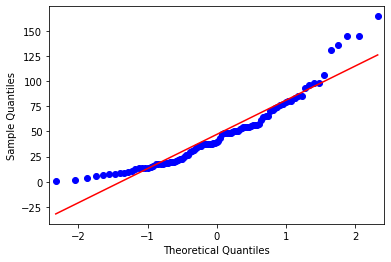

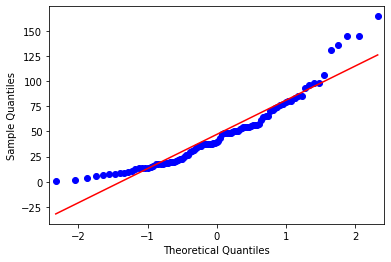

In [49]:
qqplot(REGION[month],line='s')#In this case, month="JAN"

<BarContainer object of 12 artists>

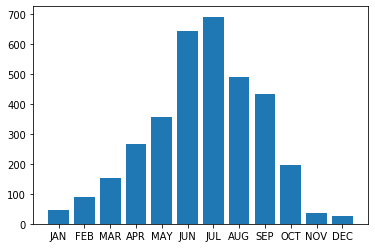

In [50]:
# regional average
x = REGION.columns[2:14]
y = [REGION[i].mean() for i in x]
plt.bar(x,y)

<BarContainer object of 12 artists>

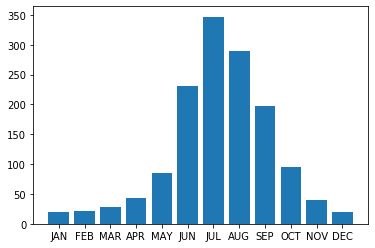

In [51]:
# National average for comparision
x = df_rain.columns[2:14]
y = [df_rain[i].mean() for i in x]
plt.bar(x,y)

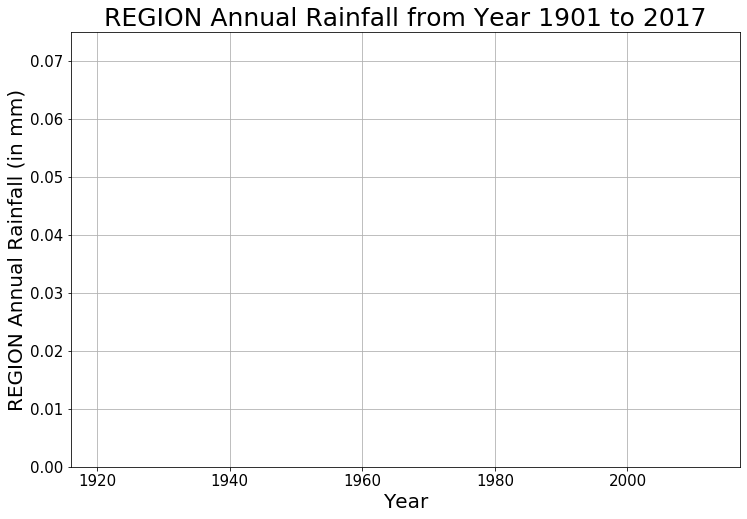

In [52]:
# helps understand how stable the seasonal rainfall in the Area 

# for data before normalization
#ax=REGION.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(1000,10000),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8))

# for data after normalization
ax=REGION.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(0,0.075),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8))

plt.xlabel('Year',fontsize=20)
plt.ylabel('REGION Annual Rainfall (in mm)',fontsize=20)
plt.title('REGION Annual Rainfall from Year 1901 to 2017',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()

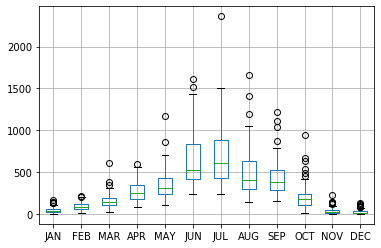

In [53]:
# extremely useful give the infromation 
#about the regions rainfall for 100 years, 
#the quantiles and helps clearly identify the outliers
boxplot = REGION.boxplot(column=['JAN', 'FEB', 
'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

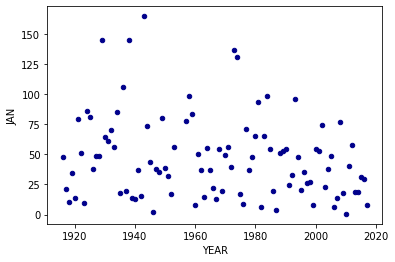

In [54]:
# gives an idea abou how the regression and the line 
#of best fit may look, also helps to identify the outliers
REGION.plot.scatter(x='YEAR', y=month, c='DarkBlue')

In [55]:
# generating the regression using the normalised values in region
X = REGION['YEAR'].values.reshape(-1,1)
y = REGION[month].values.reshape(-1,1)

# breakiing datset into test/train 80%/20%
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

#initializing regressor
regressor = sklearn.linear_model.LinearRegression()

# finding line of best fit
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#To retrieve the intercept and slope of the calculated line of best fit
print(regressor.intercept_)
print(regressor.coef_)

[431.8572478]
[[-0.1965981]]


In [57]:
#predicting values in test set
y_pred = regressor.predict(X_test)

In [58]:
# creating a simple dataframe for showcasing the Actual and predicted values
df_prediction = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_prediction

,Actual,Predicted
0,15.8,50.063734
1,48.4,37.678053
2,10.4,54.782088
3,130.9,43.772595
4,48.2,39.840632
5,40.0,36.498465
6,70.2,52.029715
7,33.2,40.233829
8,136.4,43.969193
9,18.5,36.105269


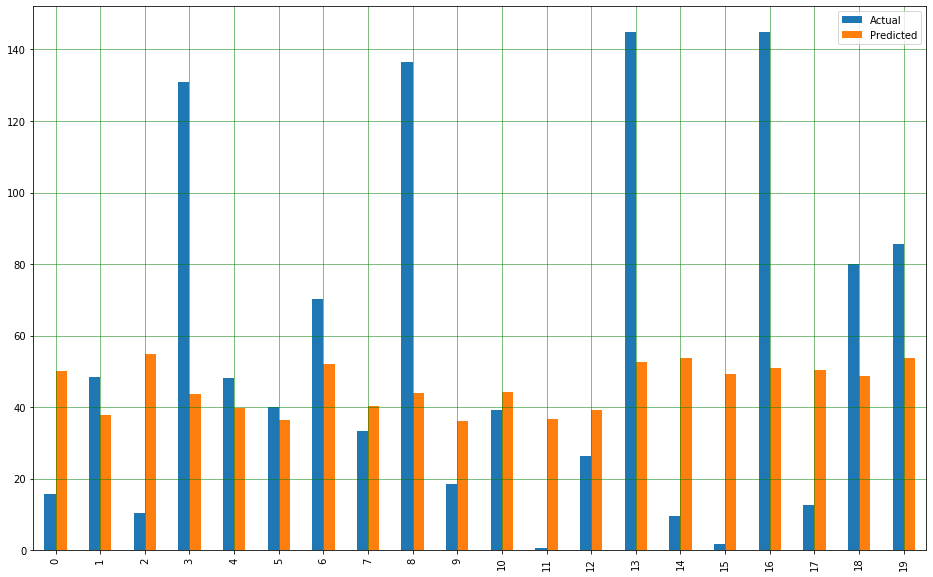

In [59]:
# to compare some actual and predicted values
df_comparision = df_prediction.head(25)
df_comparision.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

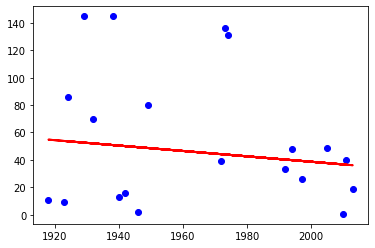

In [60]:
# to see the actual regression in action
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [61]:
# some information about the regression performed, but doesn't hold much menaing for normalized rainfall data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 37.849082277649366
Mean Squared Error: 2332.735278401655
Root Mean Squared Error: 48.29839830058192


In [62]:
# for year, region, month, the final predicted rainfall
rain = regressor.coef_*year + regressor.intercept_
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)
print(rain)

[431.8572478]
[[-0.1965981]]
[[34.92567994]]


In [63]:
# But before making the Hypothesis, want to try with data that isn't normalized and see the difference
# also, normalizing the data leads to information loss, that is, we won't be able to predict the rain fall in mm
# so we decided to no keep up with the normalization
# now we get the crop dataset, for the values of the amount a crop needs to grow
df_crop = pd.read_csv("CropWaterRequirement.csv")
#clean the data
df_crop = df_crop[['Crop', 'Water Requirement']]
df_crop = df_crop.dropna()

In [76]:
n=len(REGION[month])
mean=REGION[month].mean()
sd=REGION[month].std()
(n,mean,sd)

(99, 47.0262626262626, 34.141194179043296)

In [83]:
def one_sided_hypo(sample_mean,pop_mean,sigma,sample_size,alpha):
    actual_z=(norm.ppf(alpha))
    hypo_z=(sample_mean-pop_mean)/(sigma/sqrt(sample_size))
    print('actual z value:',actual_z)
    print('hypothesis z value:',hypo_z,'\n')
    if hypo_z>=actual_z:
        return True
    else:
        return False
pop_mean=REGION[month].mean()
sigma=REGION[month].std()
sample_size=n
sample_mean= math.floor(mean*(n/(n-1)))
alpha= 0.05
print('H0 : M <=',pop_mean)
print('H1 : M >',pop_mean)
print('alpha value is :',alpha,'\n')
reject = one_sided_hypo(sample_mean,pop_mean,sigma,sample_size,alpha)
if reject:
    print("NULL hypothesis is rejected")
else:
    print("Failed to reject NULL hypothesis")

H0 : M <= 47.0262626262626
H1 : M > 47.0262626262626
alpha value is : 0.05 

actual z value: -1.6448536269514729
hypothesis z value: -0.007653798827210687 

NULL hypothesis is rejected


In [66]:
waterForCrop = list(df_crop[(df_crop.Crop == crop)]["Water Requirement"])[0]/4
if (waterForCrop <= rain):
    print("There is no need for irrigation.")
else:
    print("There is a need for irrigation.")

There is a need for irrigation.
